In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
anime=pd.read_csv('anime.csv')
print(anime.head(5))

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [3]:
print(anime.shape)

(12294, 7)


In [4]:
ratings=pd.read_csv('rating.csv')
print(ratings.head())
print(ratings.shape)

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1
(7813737, 3)


In [5]:
watched_ratings=ratings[ratings["rating"]!=-1]

In [6]:
mean_ratings = watched_ratings.groupby(['user_id']).mean().reset_index()
mean_ratings['mean_rating'] = mean_ratings['rating']
mean_ratings.drop(['anime_id','rating'],axis=1, inplace=True)
mean_ratings.head(10)

,user_id,mean_rating
0,1,10.000000
1,2,10.000000
2,3,7.565217
3,5,4.355120
4,7,7.387755
5,8,8.333333
6,9,8.000000
7,10,9.333333
8,11,7.327273
9,12,8.818182


In [7]:
users = pd.merge(ratings,mean_ratings,on=['user_id','user_id'])
users.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,10.0
1,1,24,-1,10.0
2,1,79,-1,10.0
3,1,226,-1,10.0
4,1,241,-1,10.0


In [8]:
users = users.drop(users[users.rating < users.mean_rating].index)
users[users['user_id']== 1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,10.0
81,1,11617,10,10.0
83,1,11757,10,10.0
101,1,15451,10,10.0


In [9]:
users = users.rename({'rating':'user_rating'}, axis='columns')
merged_data = pd.merge(anime,users,on=['anime_id','anime_id'])
merged_data.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.760563
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.800000
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,8.000000
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.513245
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.654762
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [10]:
user_anime = pd.crosstab(merged_data['user_id'], merged_data['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
user_anime.shape

(69600, 8572)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)
ps = pd.DataFrame(pca_samples)
ps.head()
tocluster = pd.DataFrame(ps[[0,1,2,4,5,6,7,8,9]])

In [14]:
print(tocluster.shape)

(69600, 9)


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i,n_jobs=-1)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

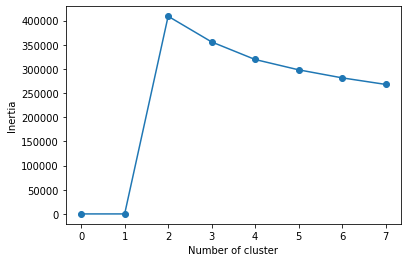

In [16]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

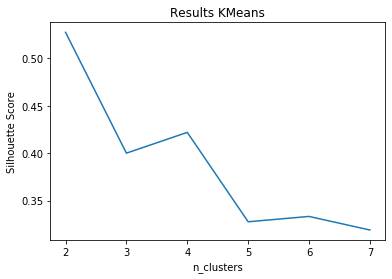

In [17]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.ylabel('Silhouette Score');
plt.show()


In [18]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=4,random_state=0,n_jobs=-1).fit(tocluster)
c_preds = clusterer.predict(tocluster)
user_anime['cluster'] = c_preds
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [19]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()
print(c0.head(10))

name
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi    0.008324
&quot;Bungaku Shoujo&quot; Memoire                     0.009651
&quot;Bungaku Shoujo&quot; Movie                       0.022319
&quot;Eiji&quot;                                       0.000241
.hack//G.U. Returner                                   0.007600
.hack//G.U. Trilogy                                    0.015925
.hack//G.U. Trilogy: Parody Mode                       0.004222
.hack//Gift                                            0.009531
.hack//Intermezzo                                      0.010134
.hack//Liminality                                      0.015080
dtype: float64


In [20]:
c0_df=pd.DataFrame(c0,columns=["mean_counts"])
c0_withgenres=pd.merge(c0_df,anime,on=['name','name'])
c0_withgenres=c0_withgenres.sort_values(by='mean_counts',ascending=False)
print(c0_withgenres.head(5))
c0_withgenres=c0_withgenres[["name","mean_counts","genre"]]
c0_withgenres=c0_withgenres[0:100]
c0_withgenres.reset_index(inplace=True,drop=True)
c0_withgenres["cluster"]=0
print(c0_withgenres.head())

                                    name  mean_counts  anime_id  \
1454                          Death Note     0.627579      1535   
1220     Code Geass: Hangyaku no Lelouch     0.624321      1575   
6663       Sen to Chihiro no Kamikakushi     0.586802       199   
1224  Code Geass: Hangyaku no Lelouch R2     0.563639      2904   
7494          Tengen Toppa Gurren Lagann     0.519604      2001   

                                                  genre   type episodes  \
1454  Mystery, Police, Psychological, Supernatural, ...     TV       37   
1220  Action, Mecha, Military, School, Sci-Fi, Super...     TV       25   
6663                     Adventure, Drama, Supernatural  Movie        1   
1224  Action, Drama, Mecha, Military, Sci-Fi, Super ...     TV       25   
7494           Action, Adventure, Comedy, Mecha, Sci-Fi     TV       27   

      rating  members  
1454    8.71  1013917  
1220    8.83   715151  
6663    8.93   466254  
1224    8.98   572888  
7494    8.78   562962  
  

In [21]:
c1_df=pd.DataFrame(c1,columns=["mean_counts"])
c1_withgenres=pd.merge(c1_df,anime,on=['name','name'])
c1_withgenres=c1_withgenres.sort_values(by=['mean_counts'],ascending=False)
c1_withgenres=c1_withgenres[["name","mean_counts","genre"]]
c1_withgenres=c1_withgenres[0:100]
c1_withgenres.reset_index(inplace=True,drop=True)
c1_withgenres["cluster"]=1
print(c1_withgenres.tail())

                                           name  mean_counts  \
95                      Ansatsu Kyoushitsu (TV)     0.179394   
96  Ore no Imouto ga Konnani Kawaii Wake ga Nai     0.178368   
97                   Suzumiya Haruhi no Yuuutsu     0.177716   
98                 Danshi Koukousei no Nichijou     0.175851   
99                                     Overlord     0.175198   

                                                genre  cluster  
95                    Action, Comedy, School, Shounen        1  
96                      Comedy, Seinen, Slice of Life        1  
97  Comedy, Mystery, Parody, School, Sci-Fi, Slice...        1  
98             Comedy, School, Shounen, Slice of Life        1  
99  Action, Adventure, Fantasy, Game, Magic, Super...        1  


In [22]:
c2_df=pd.DataFrame(c2,columns=["mean_counts"])
c2_withgenres=pd.merge(c2_df,anime,on=['name','name'])
c2_withgenres=c2_withgenres.sort_values(by=['mean_counts'],ascending=False)
c2_withgenres=c2_withgenres[["name","mean_counts","genre"]]
c2_withgenres=c2_withgenres[0:100]
c2_withgenres.reset_index(inplace=True,drop=True)
c2_withgenres["cluster"]=2
print(c2_withgenres.tail())

                           name  mean_counts  \
95        Ookami to Koushinryou     0.030769   
96  Kuroko no Basket 2nd Season     0.030393   
97           Junjou Romantica 2     0.030185   
98              NHK ni Youkoso!     0.029976   
99               Akame ga Kill!     0.029872   

                                      genre  cluster  
95  Adventure, Fantasy, Historical, Romance        2  
96          Comedy, School, Shounen, Sports        2  
97       Comedy, Drama, Romance, Shounen Ai        2  
98    Comedy, Drama, Psychological, Romance        2  
99               Action, Adventure, Fantasy        2  


In [23]:
c3_df=pd.DataFrame(c3,columns=["mean_counts"])
c3_withgenres=pd.merge(c3_df,anime,on=['name','name'])
c3_withgenres=c3_withgenres.sort_values(by=['mean_counts'],ascending=False)
c3_withgenres=c3_withgenres[["name","mean_counts","genre"]]
c3_withgenres=c3_withgenres[0:100]
c3_withgenres.reset_index(inplace=True,drop=True)
c3_withgenres["cluster"]=3
print(c3_withgenres.tail())

                                                 name  mean_counts  \
95  Fate/stay night: Unlimited Blade Works 2nd Season     0.430809   
96                        Mahouka Koukou no Rettousei     0.428198   
97              Re:Zero kara Hajimeru Isekai Seikatsu     0.428198   
98                            Neon Genesis Evangelion     0.426333   
99                                          Working!!     0.425960   

                                                genre  cluster  
95      Action, Fantasy, Magic, Shounen, Supernatural        3  
96       Magic, Romance, School, Sci-Fi, Supernatural        3  
97            Drama, Fantasy, Psychological, Thriller        3  
98  Action, Dementia, Drama, Mecha, Psychological,...        3  
99                              Comedy, Slice of Life        3  


In [24]:
combination=pd.concat([c0_withgenres,c1_withgenres,c2_withgenres,c3_withgenres])
print(combination[0:10])
combination.to_csv('top100animesearchcluster1.csv', index=False)

                                 name  mean_counts  \
0                          Death Note     0.627579   
1     Code Geass: Hangyaku no Lelouch     0.624321   
2       Sen to Chihiro no Kamikakushi     0.586802   
3  Code Geass: Hangyaku no Lelouch R2     0.563639   
4          Tengen Toppa Gurren Lagann     0.519604   
5                        Cowboy Bebop     0.517433   
6                 Fullmetal Alchemist     0.515623   
7    Fullmetal Alchemist: Brotherhood     0.506816   
8                       Mononoke Hime     0.504645   
9             Neon Genesis Evangelion     0.485583   

                                               genre  cluster  
0  Mystery, Police, Psychological, Supernatural, ...        0  
1  Action, Mecha, Military, School, Sci-Fi, Super...        0  
2                     Adventure, Drama, Supernatural        0  
3  Action, Drama, Mecha, Military, Sci-Fi, Super ...        0  
4           Action, Adventure, Comedy, Mecha, Sci-Fi        0  
5    Action, Adventur

In [25]:
a=user_anime.columns
a=list(a[:-2])
print(a)

['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi', '&quot;Bungaku Shoujo&quot; Memoire', '&quot;Bungaku Shoujo&quot; Movie', '&quot;Eiji&quot;', '.hack//G.U. Returner', '.hack//G.U. Trilogy', '.hack//G.U. Trilogy: Parody Mode', '.hack//Gift', '.hack//Intermezzo', '.hack//Liminality', '.hack//Quantum', '.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!', '.hack//Roots', '.hack//Sign', '.hack//Tasogare no Udewa Densetsu', '.hack//Tasogare no Udewa Densetsu: Offline de Aimashou', '.hack//The Movie: Sekai no Mukou ni', '.hack//Unison', '.hack//Versus: The Thanatos Report', '001', '009 Re:Cyborg', '009-1', '009-1: R&amp;B', '00:08', '07-Ghost', '1+2=Paradise', '100%', '100-man-nen Chikyuu no Tabi: Bander Book', '1000-nen Joou: Queen Millennia', '1001 Nights', '11-nin Iru!', '11eyes', '11eyes Picture Drama', '11eyes: Momoiro Genmutan', '12-sai.', '12-sai.: Chicchana Mune no Tokimeki', '15 Bishoujo Hyouryuuki', '1989', '20-dai no Heya-hen', '2005-nen Uchuu no Tabi', '21 Seiki Manga H

In [26]:
animelistdf=pd.DataFrame(np.zeros((1,len(a))),columns=a)

In [27]:
animelistdf.to_csv('animelist1.csv',index=False)

In [28]:
animelistrow=pd.DataFrame(a,columns=["name"])
animelistwithgenre=pd.merge(animelistrow,anime,on=['name','name'])
animelistwithgenre=animelistwithgenre[["name","genre"]]
print(animelistwithgenre.head())

                                                name  \
0  &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...   
1                 &quot;Bungaku Shoujo&quot; Memoire   
2                   &quot;Bungaku Shoujo&quot; Movie   
3                                   &quot;Eiji&quot;   
4                               .hack//G.U. Returner   

                                            genre  
0                         Comedy, Fantasy, School  
1                          Drama, Romance, School  
2                 Drama, Mystery, Romance, School  
3                           Comedy, Drama, Sports  
4  Adventure, Drama, Fantasy, Game, Magic, Sci-Fi  


In [29]:
animelistwithgenre.to_csv('animelistwithgenre1.csv',index=False)

In [30]:
import pickle
pickle.dump(pca,open("pca_animerecommender1.pkl","wb"))
pickle.dump(clusterer,open("animeclusterer1.pkl","wb"))

In [34]:
cluster_data=combination.copy()
cluster=1
df1=cluster_data[cluster_data["cluster"]==cluster].copy()
print(df1.head(5))

                 name  mean_counts  \
0  Shingeki no Kyojin     0.671515   
1          Death Note     0.578368   
2     No Game No Life     0.573147   
3        Angel Beats!     0.570816   
4    Sword Art Online     0.568485   

                                               genre  cluster  
0       Action, Drama, Fantasy, Shounen, Super Power        1  
1  Mystery, Police, Psychological, Supernatural, ...        1  
2  Adventure, Comedy, Ecchi, Fantasy, Game, Super...        1  
3        Action, Comedy, Drama, School, Supernatural        1  
4          Action, Adventure, Fantasy, Game, Romance        1  
